In [22]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import FinanceDataReader as fdr

# samsung electornics
df = fdr.DataReader('005930','2010-01-01')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,16060,16180,16000,16180,239271,0.012516
2010-01-05,16520,16580,16300,16440,559219,0.016069
2010-01-06,16580,16820,16520,16820,459755,0.023114
2010-01-07,16820,16820,16260,16260,443237,-0.033294
2010-01-08,16400,16420,16120,16420,295798,0.009840


In [23]:
target=pd.DataFrame(df['Close'])
data=df.loc[:,[i for i in df.columns if i !='Close']]

In [24]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
data_arr_ssc = ssc.fit_transform(data)

In [25]:
target_arr = target.values

In [26]:
def split_data(data,window):
    iter = len(data) - window*2
    temp = list()
    for i in range(iter):
        temp.append(data[i:i+window])
    return np.array(temp)

def split_target(data,window):
    iter = len(data) - window*2
    temp = list()
    for i in range(iter):
        temp.append(data[i+window:i+window*2])
    return np.array(temp)

In [27]:
data_splited=split_data(data_arr_ssc,10)

In [28]:
target_splited=split_target(target_arr,10)

In [29]:
data_splited.shape

(3179, 10, 5)

In [30]:
target_splited.shape

(3179, 10, 1)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, TimeDistributed

model_1 = Sequential()

model_1.add(LSTM(32, activation='relu', input_shape=(10,5), return_sequences=True))

# (10,5) => (10,32)
# 

model_1.add(
    TimeDistributed(Dense(units=1, input_shape=(10,32)))
    )
# (10,32) => (10,1)

model_1.compile(loss='mse', optimizer='adam')
model_1.fit(data_splited,target_splited, epochs=10)

Epoch 1/10


2022-12-16 09:57:27.160416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 10s 98ms/step - loss: 1845365248.0000
Epoch 2/10
100/100 [==============================] - 10s 96ms/step - loss: 1583018112.0000
Epoch 3/10
100/100 [==============================] - 10s 96ms/step - loss: 1518090496.0000
Epoch 4/10
100/100 [==============================] - 10s 97ms/step - loss: 1462190720.0000
Epoch 5/10
100/100 [==============================] - 10s 96ms/step - loss: 1381194624.0000
Epoch 6/10
100/100 [==============================] - 10s 96ms/step - loss: 1220780544.0000
Epoch 7/10
100/100 [==============================] - 10s 96ms/step - loss: 1071157056.0000
Epoch 8/10
100/100 [==============================] - 10s 95ms/step - loss: 967036096.0000
Epoch 9/10
100/100 [==============================] - 10s 96ms/step - loss: 904239808.0000
Epoch 10/10
100/100 [==============================] - 10s 96ms/step - loss: 951173568.0000


In [38]:
pred=model_1.predict(data_splited[-1].reshape(1,10,5))

1/1 [==============================] - 0s 91ms/step


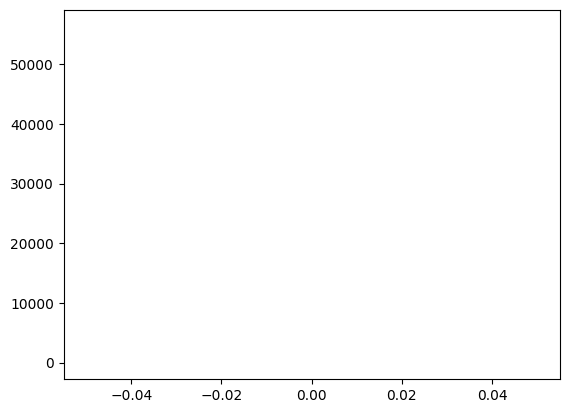

In [42]:
plt.plot(pred.reshape(1,-10))

ValueError: x and y can be no greater than 2D, but have shapes (3179,) and (3179, 10, 1)

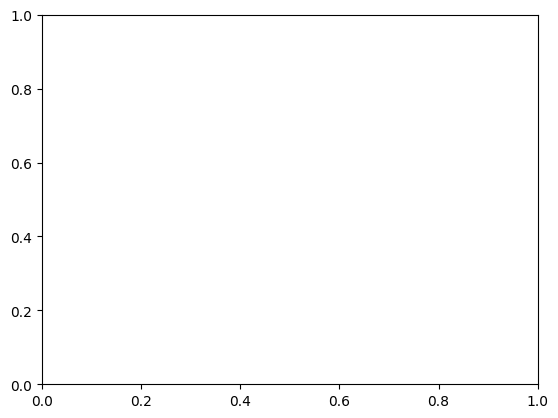

In [36]:
plt.plot(pred.reshape())
plt.plot(target_splited)

In [140]:
target_splited[-1]

array([59300])

In [141]:
my_preds = list()
my_preds.append(model_1.predict(model))

for i in range(100):
    my_preds.append(model_1.predict(my_preds[i]))

ValueError: in user code:

    File "/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/keras/engine/input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_3" "                 f"(type Sequential).
    
    Input 0 of layer "simple_rnn_3" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_3" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=False
      • mask=None
